#<center><font color='SeaGreen' size= "200">***Project AI & Cognition***</font></center>

#<font color='SaddleBrown' size= "5">***Realized by :***</font> 👩🏻‍💻🧑🏻‍💻

 *           Salma BELHADJ ALI
 *           Islem SAOUDI
 *           Arij MAZIGH
 *           Farah BEN HASSINE
 *           Yacine BENMOUSSA
 




# <font color='SaddleBrown'>**Part 1 : Data Extraction**</font> 🔍




##<font color='Chocolate'> **1- Install & import all libraries** 📚

In [1]:
!pip3 install spacy
!pip install rdflib
!pip install PyPDF2
!pip install owlready2
!pip install wordcloud
!pip install pdfplumber
!python -m spacy download en_core_web_lg 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 500 kB 6.9 MB/s 
     |████████████████████████████████| 41 kB 564 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 5.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.5 MB 1.8 MB/s 
  Created wheel for owlready2: filename=Owlready2-0.39-cp37-cp37m-linux_x86_64.whl size=22132078 sha256=9e542e912c6c8e0c2fe0ceb1c6b36366198409dea3e040f0b286133bdc354da7
  Stored in directory: /root/.cache/pip/wheels/c9/5b/fc/da1e42a17f22cd62bfb170f847a3fb541a7f628858ad3595ec
Successfully built owlready2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/

2022-10-25 19:23:45.260278: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 15 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [1]:
import re
import os
import io
import nltk
import spacy
import string
import gensim
import rdflib
import PyPDF2
import pdfplumber
import math 
import numpy as np
import pandas as pd
import en_core_web_sm
import seaborn as sns
from owlready2 import *
from rdflib	import Namespace
from spacy.tokens import Span
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from spacy.matcher import Matcher
from nltk.corpus import stopwords
from spacy.matcher import Matcher 
from nltk.probability import FreqDist
from spacy import displacy 
from nltk.tokenize import MWETokenizer
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer


In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

##<font color='Chocolate'> **2- Read the document** 📁


In [3]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# List the drive's content to fix the path
! ls /content/gdrive/MyDrive/projetIA

extract  pdf.pdf  PMBOK6-2017.pdf  PMBOK6-201.pdf  pmbok.pdf


In [5]:
# Open the file
open_filename =open("/content/gdrive/MyDrive/projetIA/pmbok.pdf","rb")
ind_manifesto = PyPDF2.PdfFileReader(open_filename)
pdf = pdfplumber.open(open_filename)

In [6]:
# Check file's information
ind_manifesto.getDocumentInfo()

{'/CreationDate': "D:20170828082604-04'00'",
 '/Creator': 'Adobe InDesign CS6 (Macintosh)',
 '/ModDate': "D:20170907131536+03'00'",
 '/PDFVersion': '1.6',
 '/Producer': '3-Heights(TM) PDF Security Shell 4.8.25.2 (http://www.pdf-tools.com)',
 '/Trapped': '/False'}

##<font color='Chocolate'> **3- Extract Chapters** 📖

In [7]:
def ChapterExtraction():
  
    c=''
    name=''
    dfChapter = pd.DataFrame(columns=['Chapter', 'Chapter Desc']) 

    for i in range (166,170) :
          c = c+ (pdf.pages[i]).extract_text()
    name = "PROJECT SCOPE MANAGEMENT"
    dfChapter = dfChapter.append({'Chapter': name,'Chapter Desc': c}, ignore_index = True)

    c=''
    for i in range (210,215) :
          c = c+ (pdf.pages[i]).extract_text()
    name = "PROJECT SCHEDULE MANAGEMENT"
    dfChapter = dfChapter.append({'Chapter': name,'Chapter Desc': c}, ignore_index = True)

    c=''
    for i in range (268,271) :
          c = c+ (pdf.pages[i]).extract_text()
    name = "PROJECT COST MANAGEMENT"
    dfChapter = dfChapter.append({'Chapter': name,'Chapter Desc': c}, ignore_index = True)

    return (dfChapter)

In [8]:
dfChapter = ChapterExtraction()
dfChapter

,Chapter,Chapter Desc
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...
1,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...
2,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...


<font color='Red'>**Attention : Irrelevant objects** ⚠️

In [9]:
# Remove page number
def remove_page_number(text):
    return re.sub("\d\d\d","",text)

def espace(text):
    return re.sub("Figure"," Figure",text)

##<font color='Chocolate'> **4- Extract Process** 📄

In [10]:
# Extract the lists of inputs, tools and outputs in order to use them for the delimitation of the process
ch = ''
for i in range (170,307) : 
		ch = ch + pdf.pages[i].extract_text()
	
ch= remove_page_number(ch)
ch = espace(ch)
inputs = re.compile(r'\d+\..+: INPUTS\n')
tools_and_techniques = re.compile(r'\d+\..+: TOOLS AND TECHNIQUES\n')
outputs = re.compile(r'\d+\..+: OUTPUTS\n')

inputsList = inputs.findall(ch)
toolsList = tools_and_techniques.findall(ch)
outputsList = outputs.findall(ch)

In [11]:
print(len(inputsList))
print(len(toolsList))
print(len(outputsList))

16
16
16


In [12]:
print(inputsList)
print(toolsList)
print(outputsList)

['5.1.1 PLAN SCOPE MANAGEMENT: INPUTS\n', '5.2.1 COLLECT REQUIREMENTS: INPUTS\n', '5.3.1 DEFINE SCOPE: INPUTS\n', '5.4.1 CREATE WBS: INPUTS\n', '5.5.1 VALIDATE SCOPE: INPUTS\n', '5.6.1 CONTROL SCOPE: INPUTS\n', '6.1.1 PLAN SCHEDULE MANAGEMENT: INPUTS\n', '6.2.1 DEFINE ACTIVITIES: INPUTS\n', '6.3.1 SEQUENCE ACTIVITIES: INPUTS\n', '6.4.1 ESTIMATE ACTIVITY DURATIONS: INPUTS\n', '6.5.1 DEVELOP SCHEDULE: INPUTS\n', '6.6.1 CONTROL SCHEDULE: INPUTS\n', '7.1.1 PLAN COST MANAGEMENT: INPUTS\n', '7.2.1 ESTIMATE COSTS: INPUTS\n', '7.3.1 DETERMINE BUDGET: INPUTS\n', '7.4.1 CONTROL COSTS: INPUTS\n']
['5.1.2 PLAN SCOPE MANAGEMENT: TOOLS AND TECHNIQUES\n', '5.2.2 COLLECT REQUIREMENTS: TOOLS AND TECHNIQUES\n', '5.3.2 DEFINE SCOPE: TOOLS AND TECHNIQUES\n', '5.4.2 CREATE WBS: TOOLS AND TECHNIQUES\n', '5.5.2 VALIDATE SCOPE: TOOLS AND TECHNIQUES\n', '5.6.2 CONTROL SCOPE: TOOLS AND TECHNIQUES\n', '6.1.2 PLAN SCHEDULE MANAGEMENT: TOOLS AND TECHNIQUES\n', '6.2.2 DEFINE ACTIVITIES: TOOLS AND TECHNIQUES\n', '6.

In [13]:
def processExtraction():

    c=''
    name=''
    chapter='PROJECT SCOPE MANAGEMENT'
    start = 0
    j = -1
    df_process = pd.DataFrame(columns=['Chapter','Process', 'Process Desc']) 

    for i in range (170,306) :
          page = (pdf.pages[i]).extract_text()
          #text = page.extract_text()
          for line in page.split('\n') :
              if re.match('\d{1}.\d\s[A-Z]+\s[A-Z]+',line) : 
                  j = j + 1 
                  if start != 0 :
                      df_process = df_process.append({'Chapter' : chapter,'Process': name, 'Process Desc':c[:-6]}, ignore_index = True)
                      if (line[0] == '5'):
                        chapter = 'PROJECT SCOPE MANAGEMENT'
                      elif (line[0] == '6'):
                        chapter = 'PROJECT SCHEDULE MANAGEMENT'
                      else:
                        chapter = 'PROJECT COST MANAGEMENT'
                  s = line[4:]
                  e = inputsList[j]
                  c = (ch.split(s))[1].split(e)[0]
                  start = i
                  name = line[4:]
                  
    df_process = df_process.append({'Chapter' : chapter,'Process' : name, 'Process Desc':c[:-6]}, ignore_index = True)
    
    return (df_process)

In [14]:
dfProcess = processExtraction()
dfProcess

,Chapter,Process,Process Desc
0,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...
1,PROJECT SCOPE MANAGEMENT,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...
2,PROJECT SCOPE MANAGEMENT,DEFINE SCOPE,\nDefine Scope is the process of developing a ...
3,PROJECT SCOPE MANAGEMENT,CREATE WBS,\nCreate WBS is the process of subdividing pro...
4,PROJECT SCOPE MANAGEMENT,VALIDATE SCOPE,\nValidate Scope is the process of formalizing...
5,PROJECT SCOPE MANAGEMENT,CONTROL SCOPE,\nControl Scope is the process of monitoring t...
6,PROJECT SCHEDULE MANAGEMENT,PLAN SCHEDULE MANAGEMENT,\nPlan Schedule Management is the process of e...
7,PROJECT SCHEDULE MANAGEMENT,DEFINE ACTIVITIES,\nDeﬁne Activities is the process of identifyi...
8,PROJECT SCHEDULE MANAGEMENT,SEQUENCE ACTIVITIES,\nSequence Activities is the process of identi...
9,PROJECT SCHEDULE MANAGEMENT,ESTIMATE ACTIVITY DURATIONS,\nEstimate Activity Durations is the process o...


##<font color='Chocolate'> **5- Extract Inputs**  ⏪

In [15]:
c = ''
dfInputs = pd.DataFrame(columns=['Title','Corpus'])
dfInputsTitres = pd.DataFrame(columns=['Process','Title','Type' ,'Corpus'])
for i in range(0,16):
    start = inputsList[i]
    end = toolsList[i]
    c = (ch.split(start))[1].split(end)[0]
    Title = re.compile(r'\d{1}.\d.\d.\d\s[A-Za-z]..+\s[A-Za-z]+\n|\d{1}.\d.\d.\d.\s[A-Za-z]..+\s[A-Za-z]+\n')
    inputsL = Title.findall(c)

    for j in range(0,len(inputsL)-1):
        st = inputsL[j]
        e = inputsL[j+1]
        co = (c.split(st))[1].split(e)[0]
        p = dfProcess['Process'][i]
        dfInputsTitres = dfInputsTitres.append({'Process' : p,'Title': st,'Type' : 'input' ,'Corpus': co} ,ignore_index = True)
    
    st = inputsL[len(inputsL)-1]
    e = c.split()[-1]
    co = (c.split(st))[1].split(e)[0]
    dfInputsTitres = dfInputsTitres.append({'Process' : p,'Title': st,'Type' : 'input' ,'Corpus': co} ,ignore_index = True)

    dfInputs = dfInputs.append({'Title': start, 'Corpus': c} ,ignore_index = True)

In [16]:
dfInputsTitres

,Process,Title,Type,Corpus
0,PLAN SCOPE MANAGEMENT,5.1.1.1 PROJECT CHARTER\n,input,Described in Section 4.1.3.1. The project char...
1,PLAN SCOPE MANAGEMENT,5.1.1.2 PROJECT MANAGEMENT PLAN\n,input,Described in Section 4.2.3.1. Project manageme...
2,PLAN SCOPE MANAGEMENT,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,input,The enterprise environmental factors that can ...
3,PLAN SCOPE MANAGEMENT,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,input,The organizational process assets that can inﬂ...
4,COLLECT REQUIREMENTS,5.2.1.1 PROJECT CHARTER\n,input,Described in Section 4.1.3.1. The project char...
...,...,...,...,...
64,CONTROL COSTS,7.4.1.1 PROJECT MANAGEMENT PLAN\n,input,Described in Section 4.2.3.1. Project manageme...
65,CONTROL COSTS,7.4.1.2. PROJECT DOCUMENTS\n,input,Examples of project documents that can be cons...
66,CONTROL COSTS,7.4.1.3 PROJECT FUNDING REQUIREMENTS\n,input,Described in Section 7.3.3.2. The project fund...
67,CONTROL COSTS,7.4.1.4 WORK PERFORMANCE DATA\n,input,Described in Section 4.3.3.2. Work performance...


##<font color='Chocolate'> **6- Extract Tools** 🔧

In [17]:
c = ''
dfTools = pd.DataFrame(columns=['Title','Corpus'])
dfToolsTitres = pd.DataFrame(columns=['Process','Title','Type' ,'Corpus'])

for i in range(0,16):
    start = toolsList[i]
    end = outputsList[i]
    c = (ch.split(start))[1].split(end)[0]
    
    Title = re.compile(r'\d{1}.\d.\d.\d\s[A-Za-z]..+\s\(PMIS\)+\n|\d{1}.\d.\d.\d\s[A-Za-z]..+\s[A-Za-z]+\n|\d{1}.\d.\d.\d.\s[A-Za-z]..+\s[A-Za-z]+\n')
    toolsL = Title.findall(c)

    for j in range(0,len(toolsL)-1):
        st = toolsL[j]
        e = toolsL[j+1]
        co = (c.split(st))[1].split(e)[0]
        p = dfProcess['Process'][i]
        dfToolsTitres = dfToolsTitres.append({'Process': p,'Title': st,'Type': 'tool' ,'Corpus': co} ,ignore_index = True)

    st = toolsL[len(toolsL)-1]
    e = c.split()[-1]
    co = (c.split(st))[1].split(e)[0]
    dfToolsTitres = dfToolsTitres.append({'Process':p,'Title': st,'Type': 'tool' ,'Corpus': co} ,ignore_index = True)

    dfTools = dfTools.append({'Title': start, 'Corpus': c} ,ignore_index = True)

In [18]:
dfToolsTitres

,Process,Title,Type,Corpus
0,PLAN SCOPE MANAGEMENT,5.1.2.1 EXPERT JUDGMENT\n,tool,Described in Section 4.1.2.1 Expertise should ...
1,PLAN SCOPE MANAGEMENT,5.1.2.2 DATA ANALYSIS\n,tool,A data analysis technique that can be used for...
2,COLLECT REQUIREMENTS,5.2.2.1 EXPERT JUDGMENT\n,tool,Described in Section 4.1.2.1. Expertise should...
3,COLLECT REQUIREMENTS,5.2.2.2 DATA GATHERING\n,tool,Data-gathering techniques that can be used for...
4,COLLECT REQUIREMENTS,5.2.2.3 DATA ANALYSIS\n,tool,Described in Section 4.5.2.2. Data analysis te...
...,...,...,...,...
65,DETERMINE BUDGET,7.3.2.5 FUNDING LIMIT RECONCILIATION\n,tool,The expenditure of funds should be reconciled ...
66,CONTROL COSTS,7.4.2.1 EXPERT JUDGMENT\n,tool,Described in Section 4.1.2.1. Examples of expe...
67,CONTROL COSTS,7.4.2.2 DATA ANALYSIS\n,tool,Data analysis techniques that can be used to c...
68,CONTROL COSTS,7.4.2.3 TO-COMPLETE PERFORMANCE INDEX\n,tool,The to-complete performance index (TCPI) is a ...


##<font color='Chocolate'> **7- Extract Outputs** ⏯

In [19]:
c = ''
dfOutputs = pd.DataFrame(columns=['Title','Corpus'])

for i in range(0,15):
    start = outputsList[i]
    end = dfProcess['Process'][i+1]
    c = (ch.split(start))[1].split(end)[0]
    dfOutputs = dfOutputs.append({'Title': start, 'Corpus': c} ,ignore_index = True)

start = outputsList[15]
end = ch.split()[-1]
c = (ch.split(start))[1].split(end)[0]

dfOutputs = dfOutputs.append({'Title': start, 'Corpus': c} ,ignore_index = True)

In [20]:
dfOutputsTitres = pd.DataFrame(columns=['Process','Title','Type', 'Corpus'])

for i in range(0,len(dfOutputs)):
    c = dfOutputs['Corpus'][i]
    Title = re.compile(r'\d{1}.\d.\d.\d\s[A-Za-z]..+\s[A-Za-z]+\n|\d{1}.\d.\d.\d.\s[A-Za-z]..+\s[A-Za-z]+\n')
    outputsL = Title.findall(c)

    for j in range(0,len(outputsL)-1):
        st = outputsL[j]
        e = outputsL[j+1]
        co = (c.split(st))[1].split(e)[0]
        p = dfProcess['Process'][i]
        dfOutputsTitres = dfOutputsTitres.append({'Process':p,'Title': st, 'Type' : 'output','Corpus': co} ,ignore_index = True)

        st = outputsL[len(outputsL)-1]
        e = ch.split()[-1]
        co = (c.split(st))[1].split(e)[0]
        dfOutputsTitres = dfOutputsTitres.append({'Process':p,'Title': st, 'Type' : 'output','Corpus': co} ,ignore_index = True)

In [21]:
dfOutputsTitres

,Process,Title,Type,Corpus
0,PLAN SCOPE MANAGEMENT,5.1.3.1 SCOPE MANAGEMENT PLAN\n,output,The scope management plan is a component of th...
1,PLAN SCOPE MANAGEMENT,5.1.3.2 REQUIREMENTS MANAGEMENT PLAN\n,output,The requirements management plan is a componen...
2,COLLECT REQUIREMENTS,5.2.3.1 REQUIREMENTS DOCUMENTATION\n,output,Requirements documentation describes how indiv...
3,COLLECT REQUIREMENTS,5.2.3.2 REQUIREMENTS TRACEABILITY MATRIX\n,output,The requirements traceability matrix is a grid...
4,DEFINE SCOPE,5.3.3.1 PROJECT SCOPE STATEMENT\n,output,The project scope statement is the description...
...,...,...,...,...
57,ESTIMATE COSTS,7.2.3.3 PROJECT DOCUMENTS UPDATES\n,output,Project documents that may be updated as a res...
58,DETERMINE BUDGET,7.3.3.1 COST BASELINE\n,output,The cost baseline is the approved version of t...
59,DETERMINE BUDGET,7.3.3.3 PROJECT DOCUMENTS UPDATES\n,output,Project documents that may be updated as a res...
60,DETERMINE BUDGET,7.3.3.2 PROJECT FUNDING REQUIREMENTS\n,output,Total funding requirements and periodic fundin...


##<font color='Chocolate'> **8- Merge the data** 📑🔀

In [22]:
df = dfChapter.append(dfProcess, ignore_index=True)
df = pd.merge(dfChapter, dfProcess, on = "Chapter", how = "outer")
df

,Chapter,Chapter Desc,Process,Process Desc
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...
1,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...
2,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,DEFINE SCOPE,\nDefine Scope is the process of developing a ...
3,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,CREATE WBS,\nCreate WBS is the process of subdividing pro...
4,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,VALIDATE SCOPE,\nValidate Scope is the process of formalizing...
5,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,CONTROL SCOPE,\nControl Scope is the process of monitoring t...
6,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,PLAN SCHEDULE MANAGEMENT,\nPlan Schedule Management is the process of e...
7,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,DEFINE ACTIVITIES,\nDeﬁne Activities is the process of identifyi...
8,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,SEQUENCE ACTIVITIES,\nSequence Activities is the process of identi...
9,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,ESTIMATE ACTIVITY DURATIONS,\nEstimate Activity Durations is the process o...


In [23]:
df1 = dfInputsTitres.append(dfToolsTitres, ignore_index=True)
df2 = df1.append(dfOutputsTitres, ignore_index=True)
dfFinale = pd.merge(df, df2, on = "Process", how = "outer")

In [24]:
dfFinale

,Chapter,Chapter Desc,Process,Process Desc,Title,Type,Corpus
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.1 PROJECT CHARTER\n,input,Described in Section 4.1.3.1. The project char...
1,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.2 PROJECT MANAGEMENT PLAN\n,input,Described in Section 4.2.3.1. Project manageme...
2,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,input,The enterprise environmental factors that can ...
3,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,input,The organizational process assets that can inﬂ...
4,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.2.1 EXPERT JUDGMENT\n,tool,Described in Section 4.1.2.1 Expertise should ...
...,...,...,...,...,...,...,...
196,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.1.5 ORGANIZATIONAL PROCESS ASSETS\n,input,The organizational process assets that can inﬂ...
197,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.1 EXPERT JUDGMENT\n,tool,Described in Section 4.1.2.1. Examples of expe...
198,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.2 DATA ANALYSIS\n,tool,Data analysis techniques that can be used to c...
199,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.2.3 TO-COMPLETE PERFORMANCE INDEX\n,tool,The to-complete performance index (TCPI) is a ...


In [27]:
# dfChapter1 = pd.DataFrame()
# dfProcess1 = pd.DataFrame()
# dfInputsTitres1 = pd.DataFrame()
# dfToolsTitres1 = pd.DataFrame()
# dfOutputsTitres1 = pd.DataFrame()

In [25]:
dfChapter1 = dfChapter.copy()
dfChapter1.rename(columns = {'Chapter':'Title' , 'Chapter Desc' : 'Corpus'}, inplace = True)
dfChapter1['Type'] = 'chapter'


dfProcess1 = dfProcess.copy()
dfProcess1.rename(columns = {'Process':'Title', 'Process Desc' : 'Corpus'}, inplace = True)
dfProcess1 = dfProcess1.drop(['Chapter'], axis=1)
dfProcess1['Type'] = 'process'

dfInputsTitres1 = dfInputsTitres.copy()
dfInputsTitres1 = dfInputsTitres1.drop(['Process'], axis=1)

dfToolsTitres1 = dfToolsTitres.copy()
dfToolsTitres1 = dfToolsTitres1.drop(['Process'], axis=1)

dfOutputsTitres1 = dfOutputsTitres.copy()
dfOutputsTitres1 = dfOutputsTitres1.drop(['Process'], axis=1)

In [26]:
df11 = dfChapter1.append(dfProcess1, ignore_index=True)
df12 = dfInputsTitres1.append(dfToolsTitres1, ignore_index=True)
df13 = df11.append(df12, ignore_index=True)
dfFinalee = df13.append(dfOutputsTitres1, ignore_index=True)

In [27]:
dfFinalee

,Title,Corpus,Type
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,chapter
1,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,chapter
2,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,chapter
3,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,process
4,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...,process
...,...,...,...
215,7.2.3.3 PROJECT DOCUMENTS UPDATES\n,Project documents that may be updated as a res...,output
216,7.3.3.1 COST BASELINE\n,The cost baseline is the approved version of t...,output
217,7.3.3.3 PROJECT DOCUMENTS UPDATES\n,Project documents that may be updated as a res...,output
218,7.3.3.2 PROJECT FUNDING REQUIREMENTS\n,Total funding requirements and periodic fundin...,output


# <font color='SaddleBrown'>**Part 2 : Data Cleaning**</font> 🧽

In [28]:
print(dfFinalee.shape)

(220, 3)


##<font color='Chocolate'> **1- Drop duplicated values** 🗑️❌

In [29]:
dfFinalee.duplicated(subset=['Corpus']).value_counts()

False    202
True      18
dtype: int64

In [31]:
dfFinalee = dfFinalee.drop_duplicates()
dfFinalee

,Title,Corpus,Type
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,chapter
1,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,chapter
2,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,chapter
3,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,process
4,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...,process
...,...,...,...
213,7.2.3.3 PROJECT DOCUMENTS UPDATES\n,Project documents that may be updated as a res...,output
214,7.2.3.2 BASIS OF ESTIMATES\n,The amount and type of additional details supp...,output
216,7.3.3.1 COST BASELINE\n,The cost baseline is the approved version of t...,output
217,7.3.3.3 PROJECT DOCUMENTS UPDATES\n,Project documents that may be updated as a res...,output


In [32]:
print(dfFinalee.shape)

(202, 3)


In [33]:
dfFinalee = dfFinalee.reset_index(drop = True)

##<font color='Chocolate'> **2- Detect null values** 🗅❌

In [34]:
print(dfFinalee.isnull().sum())

Title     0
Corpus    0
Type      0
dtype: int64


##<font color='Chocolate'> **3- LowerCase** 🔽

In [36]:
def lowercase(text):
    return text.lower()

In [37]:
dfFinalee['Corpus'][8]

'\nControl Scope is the process of monitoring the status of the project and product scope and managing changes to \nthe scope baseline. The key beneﬁt of this process is that the scope baseline is maintained throughout the project. This \nprocess is performed throughout the project. The inputs, tools and techniques, and outputs of this process are depicted \nin  Figure 5-17.  Figure 5-18 depicts the data ﬂow diagram of the process.\nControl Scope\nInputs Tools & Techniques Outputs\n.1 Project management plan .1 Data analysis .1 Work performance  \n• Scope management plan • Variance analysis   information\n• Requirements management • Trend analysis .2 Change requests\n    plan .3 Project management plan  \n• Change management plan   updates\n• Configuration management • Scope management plan\n    plan • Scope baseline\n• Scope baseline • Schedule baseline\n• Performance measurement • Cost baseline\n    baseline • Performance measurement\n.2 Project documents     baseline\n• Lessons lear

In [38]:
dfFinalee['Corpus']= dfFinalee['Corpus'].apply(lambda x : lowercase(x))

In [39]:
dfFinalee['Corpus'][8]

'\ncontrol scope is the process of monitoring the status of the project and product scope and managing changes to \nthe scope baseline. the key beneﬁt of this process is that the scope baseline is maintained throughout the project. this \nprocess is performed throughout the project. the inputs, tools and techniques, and outputs of this process are depicted \nin  figure 5-17.  figure 5-18 depicts the data ﬂow diagram of the process.\ncontrol scope\ninputs tools & techniques outputs\n.1 project management plan .1 data analysis .1 work performance  \n• scope management plan • variance analysis   information\n• requirements management • trend analysis .2 change requests\n    plan .3 project management plan  \n• change management plan   updates\n• configuration management • scope management plan\n    plan • scope baseline\n• scope baseline • schedule baseline\n• performance measurement • cost baseline\n    baseline • performance measurement\n.2 project documents     baseline\n• lessons lear

##<font color='Chocolate'> **4- Remove line return "\n"** ↩️

In [40]:
def remove_return(text):
    return re.sub("\n"," ",text)

In [41]:
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x : remove_return(x))

In [42]:
dfFinalee['Corpus'][8]

' control scope is the process of monitoring the status of the project and product scope and managing changes to  the scope baseline. the key beneﬁt of this process is that the scope baseline is maintained throughout the project. this  process is performed throughout the project. the inputs, tools and techniques, and outputs of this process are depicted  in  figure 5-17.  figure 5-18 depicts the data ﬂow diagram of the process. control scope inputs tools & techniques outputs .1 project management plan .1 data analysis .1 work performance   • scope management plan • variance analysis   information • requirements management • trend analysis .2 change requests     plan .3 project management plan   • change management plan   updates • configuration management • scope management plan     plan • scope baseline • scope baseline • schedule baseline • performance measurement • cost baseline     baseline • performance measurement .2 project documents     baseline • lessons learned register .4 pr

##<font color='Chocolate'> **5- Remove numbers and punctuations** ❕❔

In [43]:
def remove_punctuations(text):
    return re.sub(r'[^a-z\s]','', text)

In [45]:
def remove_extra_char(text):
    return re.sub(r'uu','', text)

In [46]:
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x : remove_punctuations(x))
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x : remove_extra_char(x))

In [47]:
dfFinalee['Corpus'][8]

' control scope is the process of monitoring the status of the project and product scope and managing changes to  the scope baseline the key benet of this process is that the scope baseline is maintained throughout the project this  process is performed throughout the project the inputs tools and techniques and outputs of this process are depicted  in  figure   figure  depicts the data ow diagram of the process control scope inputs tools  techniques outputs  project management plan  data analysis  work performance    scope management plan  variance analysis   information  requirements management  trend analysis  change requests     plan  project management plan    change management plan   updates  configuration management  scope management plan     plan  scope baseline  scope baseline  schedule baseline  performance measurement  cost baseline     baseline  performance measurement  project documents     baseline  lessons learned register  project documents updates  requirements  lessons

##<font color='Chocolate'> **6- Remove white space** ⬜󠀠

In [48]:
def remove_whitespaces(text):
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()

In [50]:
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x : remove_whitespaces(x))

In [51]:
dfFinalee['Corpus'][0]

'project scope management overview plan scope collect define scope management requirements inputs inputs inputs project charter project charter project charter project management plan project management plan project management plan enterprise environmental project documents project documents factors business documents enterprise environmental organizational process assets agreements factors enterprise environmental organizational process assets tools techniques factors expert judgment tools techniques organizational process assets data analysis expert judgment meetings tools techniques data analysis expert judgment decision making outputs data gathering interpersonal and team skills scope management plan data analysis product analysis requirements management decision making plan outputs data representation project scope statement interpersonal and team skills project documents updates context diagram prototypes create wbs outputs control scope requirements documentation inputs requirem

##<font color='Chocolate'> **7- Remove repeated characters** 🔂

In [52]:
def unique_list(text_str):
    l = text_str.split()
    temp = []
    for x in l:
        if x not in temp:
            temp.append(x)
    return ' '.join(temp)

In [53]:
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x : unique_list(x))

In [55]:
dfFinalee['Corpus'][0]

'project scope management overview plan collect define requirements inputs charter enterprise environmental documents factors business organizational process assets agreements tools techniques expert judgment data analysis meetings decision making outputs gathering interpersonal and team skills product representation statement updates context diagram prototypes create wbs control documentation traceability matrix validate work performance decomposition baseline verified deliverables information change requests inspection accepted figure part guide key concepts for in the term can refer to features functions that characterize a service or result performed deliver with specied is sometimes viewed as including life cycles range along continm from predictive approaches at one end adaptive agile other cycle are dened beginning of any changes progressively managed an developed over multiple iterations where detailed approved each iteration when it begins projects intended respond high levels

##<font color='Chocolate'> **8- Change data type to string** ✨

In [56]:
dfFinalee = dfFinalee.astype(str)
dfFinalee

,Title,Corpus,Type
0,PROJECT SCOPE MANAGEMENT,project scope management overview plan collect...,chapter
1,PROJECT SCHEDULE MANAGEMENT,project schedule management overview plan defi...,chapter
2,PROJECT COST MANAGEMENT,project cost management overview plan estimate...,chapter
3,PLAN SCOPE MANAGEMENT,plan scope management is the process of creati...,process
4,COLLECT REQUIREMENTS,collect requirements is the process of determi...,process
...,...,...,...
197,7.2.3.3 PROJECT DOCUMENTS UPDATES\n,project documents that may be updated as a res...,output
198,7.2.3.2 BASIS OF ESTIMATES\n,the amount and type of additional details supp...,output
199,7.3.3.1 COST BASELINE\n,the cost baseline is approved version of timep...,output
200,7.3.3.3 PROJECT DOCUMENTS UPDATES\n,project documents that may be updated as a res...,output


# <font color='SaddleBrown'>**Part 3 : Data Pre-processing**</font> 🤔

##<font color='Chocolate'> **1- Stop words** 🛑

In [57]:
# NLTK Stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
unimportant_words = ["you're", "you've", "she's", "it's",
                "should've",'d', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren',
                "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", "haven't", 'isn', "isn't", 'will','such','as', 'weren', "weren't",
                'won', "won't", 'wouldn', "wouldn't",'PMBOK® Guide','Page','A Practice Guide','described','section']
stop_words = stop_words + unimportant_words

In [58]:
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [59]:
dfFinalee['Corpus'][0]

'project scope management overview plan collect define requirements inputs charter enterprise environmental documents factors business organizational process assets agreements tools techniques expert judgment data analysis meetings decision making outputs gathering interpersonal team skills product representation statement updates context diagram prototypes create wbs control documentation traceability matrix validate work performance decomposition baseline verified deliverables information change requests inspection accepted figure part guide key concepts term refer features functions characterize service result performed deliver specied sometimes viewed including life cycles range along continm predictive approaches one end adaptive agile cycle dened beginning changes progressively managed developed multiple iterations detailed approved iteration begins projects intended respond high levels require ongoing stakeholder engagement overall decomposed set referred backlog determine many 

##<font color='Chocolate'> **2- Tokenization** 🪙

In [60]:
# Perform tokenization in combination with regular expressions
regexp = RegexpTokenizer('\w+')
dfFinalee['Corpus_Tokens']=dfFinalee['Corpus'].apply(regexp.tokenize)

In [61]:
dfFinalee['Corpus_Tokens']

0      [project, scope, management, overview, plan, c...
1      [project, schedule, management, overview, plan...
2      [project, cost, management, overview, plan, es...
3      [plan, scope, management, process, creating, d...
4      [collect, requirements, process, determining, ...
                             ...                        
197    [project, documents, may, updated, result, car...
198    [amount, type, additional, details, supporting...
199    [cost, baseline, approved, version, timephased...
200    [project, documents, may, updated, result, car...
201    [total, funding, requirements, periodic, eg, q...
Name: Corpus_Tokens, Length: 202, dtype: object

##<font color='Chocolate'> **3- Compound words' tokens** 🪙

In [62]:
# Perform tokenization by MWETokenizer for Compound words
tk = MWETokenizer([('project', 'scope', 'management'),('define', 'activities'),('sequence', 'activities'),('plan', 'scope', 'management'),('project', 'schedule', 'management'),('collect', 'requirements'),( 'control', 'scope'),('estimate', 'activity', 'durations'),
                   ('plan', 'cost', 'management'),('project', 'cost', 'management'),('create', 'wbs'),('develop', 'schedule'),('plan', 'schedule', 'management'),('define', 'scope'),('validate', 'scope'),('control', 'schedule'),('project', 'charter'),('project', 'management')])
dfFinalee['Corpus_MWE'] = ""
for i in range(len(dfFinalee)):
  text= dfFinalee['Corpus_Tokens'][i]
  tokenized = tk.tokenize(text)
  dfFinalee['Corpus_MWE'][i] = tokenized



In [64]:
dfFinalee['Corpus_MWE']

0      [project_scope_management, overview, plan, col...
1      [project_schedule_management, overview, plan, ...
2      [project_cost_management, overview, plan, esti...
3      [plan_scope_management, process, creating, doc...
4      [collect_requirements, process, determining, d...
                             ...                        
197    [project, documents, may, updated, result, car...
198    [amount, type, additional, details, supporting...
199    [cost, baseline, approved, version, timephased...
200    [project, documents, may, updated, result, car...
201    [total, funding, requirements, periodic, eg, q...
Name: Corpus_MWE, Length: 202, dtype: object

##<font color='Chocolate'> **4- Lemmatization** 🗣️

In [65]:
wnl = WordNetLemmatizer()

def lemmatize(s):
  s = [wnl.lemmatize(word) for word in s]
  return s

dfFinalee = dfFinalee.assign(Corpus_Lemma = dfFinalee.Corpus_MWE.apply(lambda x: lemmatize(x)))

In [66]:
dfFinalee['Corpus_Lemma']

0      [project_scope_management, overview, plan, col...
1      [project_schedule_management, overview, plan, ...
2      [project_cost_management, overview, plan, esti...
3      [plan_scope_management, process, creating, doc...
4      [collect_requirements, process, determining, d...
                             ...                        
197    [project, document, may, updated, result, carr...
198    [amount, type, additional, detail, supporting,...
199    [cost, baseline, approved, version, timephased...
200    [project, document, may, updated, result, carr...
201    [total, funding, requirement, periodic, eg, qu...
Name: Corpus_Lemma, Length: 202, dtype: object

##<font color='Chocolate'> **5- POS-Tagging** 🏷️🚩

In [67]:
nlp = en_core_web_sm.load()
dfFinalee['Pos_Tag']=dfFinalee['Corpus_Lemma'].apply(nltk.pos_tag)

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


In [68]:
dfFinalee

,Title,Corpus,Type,Corpus_Tokens,Corpus_MWE,Corpus_Lemma,Pos_Tag
0,PROJECT SCOPE MANAGEMENT,project scope management overview plan collect...,chapter,"[project, scope, management, overview, plan, c...","[project_scope_management, overview, plan, col...","[project_scope_management, overview, plan, col...","[(project_scope_management, NN), (overview, NN..."
1,PROJECT SCHEDULE MANAGEMENT,project schedule management overview plan defi...,chapter,"[project, schedule, management, overview, plan...","[project_schedule_management, overview, plan, ...","[project_schedule_management, overview, plan, ...","[(project_schedule_management, NN), (overview,..."
2,PROJECT COST MANAGEMENT,project cost management overview plan estimate...,chapter,"[project, cost, management, overview, plan, es...","[project_cost_management, overview, plan, esti...","[project_cost_management, overview, plan, esti...","[(project_cost_management, NN), (overview, NN)..."
3,PLAN SCOPE MANAGEMENT,plan scope management process creating documen...,process,"[plan, scope, management, process, creating, d...","[plan_scope_management, process, creating, doc...","[plan_scope_management, process, creating, doc...","[(plan_scope_management, JJ), (process, NN), (..."
4,COLLECT REQUIREMENTS,collect requirements process determining docum...,process,"[collect, requirements, process, determining, ...","[collect_requirements, process, determining, d...","[collect_requirements, process, determining, d...","[(collect_requirements, NNS), (process, NN), (..."
...,...,...,...,...,...,...,...
197,7.2.3.3 PROJECT DOCUMENTS UPDATES\n,project documents may updated result carrying ...,output,"[project, documents, may, updated, result, car...","[project, documents, may, updated, result, car...","[project, document, may, updated, result, carr...","[(project, NN), (document, NN), (may, MD), (up..."
198,7.2.3.2 BASIS OF ESTIMATES\n,amount type additional details supporting cost...,output,"[amount, type, additional, details, supporting...","[amount, type, additional, details, supporting...","[amount, type, additional, detail, supporting,...","[(amount, NN), (type, VBD), (additional, JJ), ..."
199,7.3.3.1 COST BASELINE\n,cost baseline approved version timephased proj...,output,"[cost, baseline, approved, version, timephased...","[cost, baseline, approved, version, timephased...","[cost, baseline, approved, version, timephased...","[(cost, NN), (baseline, NN), (approved, VBN), ..."
200,7.3.3.3 PROJECT DOCUMENTS UPDATES\n,project documents may updated result carrying ...,output,"[project, documents, may, updated, result, car...","[project, documents, may, updated, result, car...","[project, document, may, updated, result, carr...","[(project, NN), (document, NN), (may, MD), (up..."


##<font color='Chocolate'> **6- Chunking** 🧩

In [106]:
#"NP:{<DT>?<JJ>*<NN>}"
chunk = []
sentence = dfFinalee['Pos_Tag']
grammar="Chunk:{<NN.?><VB.?><JJ>*<NN.?>}"
chunkParser = nltk.RegexpParser(grammar)
print(chunkParser)
for s in dfFinalee['Pos_Tag']:
  chunked = chunkParser.parse(s)
  chunk.append(chunked)
  print(chunked)


chunk.RegexpParser with 1 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<NN.?><VB.?><JJ>*<NN.?>'>
(S
  project_scope_management/NN
  overview/NN
  (Chunk plan/NN collect/VBP define/JJ requirement/NN)
  input/NN
  charter/NN
  enterprise/NN
  environmental/JJ
  document/JJ
  factor/NN
  business/NN
  organizational/JJ
  process/NN
  asset/NN
  agreement/NN
  tool/NN
  technique/NN
  expert/JJ
  judgment/NN
  data/NNS
  analysis/NN
  meeting/NN
  decision/NN
  making/NN
  (Chunk output/NN gathering/VBG interpersonal/JJ team/NN)
  skill/NN
  product/NN
  representation/NN
  statement/NN
  update/JJ
  context/NN
  diagram/NN
  prototype/NN
  create_wbs/NN
  control/NN
  documentation/NN
  traceability/NN
  matrix/NN
  validate/NN
  work/NN
  performance/NN
  decomposition/NN
  (Chunk baseline/NN verified/VBD deliverable/JJ information/NN)
  change/NN
  request/NN
  (Chunk inspection/NN accepted/VBD figure/JJ part/NN)
  guide/NN
  key/JJ
  concept/JJ
  (Chunk term/NN refer/VBP

##<font color='Chocolate'> **7- Spacy** 🔵 

In [70]:
# load spaCy model
nlp = spacy.load("en_core_web_sm")

In [71]:
#doc = nlp("A healthy eating pattern includes fruits, especially whole fruits.") 
for i in  (dfFinalee['Corpus']):
  i = nlp(i)
  for tok in i: 
    print(tok.text, "-->", tok.dep_, "-->", tok.pos_)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
iterative --> amod --> ADJ
technique --> compound --> NOUN
work --> dobj --> NOUN
accomplished --> acl --> VERB
near --> prep --> ADP
term --> nmod --> NOUN
planned --> amod --> VERB
detail --> pobj --> NOUN
future --> amod --> ADJ
higher --> amod --> ADJ
level --> nmod --> NOUN
form --> nmod --> NOUN
progressive --> amod --> ADJ
elaboration --> nmod --> NOUN
applicable --> amod --> ADJ
packages --> compound --> NOUN
release --> nsubj --> NOUN
using --> xcomp --> VERB
agile --> amod --> ADJ
waterfall --> compound --> NOUN
approach --> dobj --> NOUN
therefore --> advmod --> ADV
exist --> ccomp --> VERB
various --> amod --> ADJ
levels --> dobj --> NOUN
depending --> acl --> VERB
project --> compound --> NOUN
life --> compound --> NOUN
cycle --> dobj --> NOUN
early --> amod --> ADJ
strategic --> amod --> ADJ
information --> nsubj --> NOUN
less --> advmod --> ADV
dened --> acl --> ADJ
may --> aux --> AUX
decompos

##<font color='Chocolate'> **8- Synonyms** ==

In [73]:
from nltk.corpus import wordnet
def find_synonym_ontology(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lm in syn.lemmas():
            synonyms.append(lm.name())
    return list(set(synonyms))


In [74]:
print("Synonyms of project : ", find_synonym_ontology("project"))
print("Synonyms of management: ", find_synonym_ontology("management"))
print("Synonyms of change: ", find_synonym_ontology("change"))

Synonyms of project :  ['jut', 'externalise', 'see', 'protrude', 'stick_out', 'figure', 'send_off', 'visualize', 'plan', 'design', 'fancy', 'picture', 'labor', 'propose', 'undertaking', 'jut_out', 'contrive', 'cast', 'project', 'visualise', 'projection', 'image', 'task', 'envision', 'externalize', 'throw']
Synonyms of management:  ['direction', 'management']
Synonyms of change:  ['convert', 'vary', 'alter', 'modify', 'commute', 'interchange', 'deepen', 'exchange', 'switch', 'shift', 'alteration', 'change', 'transfer', 'modification', 'variety']


In [75]:
dfSyn = pd.DataFrame(columns = ['words','synonyms'])

for i in dfFinalee['Corpus_MWE']:
    for word in i:
        s = find_synonym_ontology(word)
        dfSyn = dfSyn.append({'words': word ,'synonyms': s} ,ignore_index = True)


In [76]:
for i in range(len(dfSyn)):
  if (len(dfSyn['words'][i]) == 1):
     dfSyn=dfSyn.drop(i)
dfSyn=dfSyn.reset_index(drop = True)

In [77]:
dfSyn

,words,synonyms
0,project_scope_management,[]
1,overview,[overview]
2,plan,"[be_after, contrive, program, project, program..."
3,collect,"[garner, roll_up, cod, hoard, accumulate, coll..."
4,define,"[specify, delimit, limit, determine, fix, defi..."
...,...,...
10956,required,"[ask, compulsory, needful, mandatory, need, re..."
10957,included,"[included, include, let_in, admit]"
10958,management,"[direction, management]"
10959,reserves,"[reservation, book, earmark, military_reserve,..."


##<font color='Chocolate'> **9- TF-IDF** 🔢

In [78]:
# Instantiate CountVectorizer() 
cv=CountVectorizer() 
# This steps generates word counts for the words in your docs 
dfFinalee['Corpus_Lemma']=dfFinalee['Corpus_Lemma'].astype(str)
word_count_vector=cv.fit_transform(dfFinalee['Corpus_Lemma'])
word_count_vector.shape

(202, 2147)

In [79]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [80]:
# Print IDF values 
dfIDF = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["IDF_Weights"]) 
# Sort ascending 
dfIDF.sort_values(by=['IDF_Weights'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,IDF_Weights
project,1.438009
include,1.501022
process,1.559616
limited,1.649767
information,1.995718
...,...
elicitation,5.620059
placing,5.620059
electronics,5.620059
engine,5.620059


In [81]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dfFinalee['Corpus_Lemma'])
print(vectorizer.get_feature_names())

['abbreviation', 'abc', 'abd', 'ability', 'able', 'abstract', 'ac', 'accelerate', 'accelerated', 'acceleration', 'acceptable', 'acceptance', 'accepted', 'accepts', 'accessible', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accordance', 'according', 'account', 'accounted', 'accounting', 'accumulate', 'accuracy', 'accurate', 'accurately', 'acd', 'achievable', 'achieve', 'achieved', 'achieves', 'achieving', 'acknowledges', 'acknowledging', 'acmal', 'acquire', 'acquired', 'acquiring', 'acquisition', 'across', 'act', 'acted', 'action', 'active', 'activitie', 'activity', 'activityonnode', 'actor', 'actual', 'actually', 'adapt', 'adaptive', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'address', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'adjusts', 'administration', 'adopt', 'adopted', 'adoption', 'advance', 'advanced', 'advantage', 'advertising', 'affect', 'affected', 'affinity', 'afnity', 'agency', 'aggregate', 'aggregated', 'aggregating', 'aggre

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##<font color='Chocolate'> **10- Similarty Distance** ⚖

In [82]:
dfFinalee['Corpus_Lemma']=dfFinalee['Corpus_Lemma'].astype(str)
import random
dfFinalee['Corpus_Lemma']=dfFinalee['Corpus_Lemma'].apply(lambda x : remove_punctuations(x))
dfFinalee['Corpus_Lemma']=dfFinalee['Corpus_Lemma'].apply(lambda x : remove_whitespaces(x))
def LevenshteinDistance():
  edDictio={}
  for i in range(len(dfFinalee)):
      word = str(dfFinalee['Corpus_Lemma']).split()
      #print(word)
      a=random.choice(word)
      b=random.choice(word)
      ed_sent=nltk.edit_distance(a,b)
      edDictio[a,b]=ed_sent
  print(edDictio)

In [83]:
LevenshteinDistance()

{('planscopemanagement', '1'): 19, ('process', 'document'): 6, ('version', 'd...'): 7, ('approved', 'result'): 8, ('plan', 'funding'): 6, ('result', 'document'): 6, ('plan', 'dtype:'): 6, ('collect', 'supporting'): 9, ('periodic', 'result'): 7, ('process', 'Length:'): 7, ('202,', '2'): 3, ('dtype:', 'approved'): 7, ('timephased', 'result'): 9, ('define...', 'result'): 8, ('cost', 'funding'): 7, ('collectrequirements', 'result'): 15, ('...', 'may'): 3, ('proj...', 'Name:'): 7, ('p...', '0'): 4, ('197', '...'): 3, ('docume...', 'Length:'): 9, ('proj...', 'approved'): 6, ('document', 'approved'): 8, ('Length:', 'project'): 7, ('quarterl...', '1'): 11, ('result', 'define...'): 8, ('document', '0'): 8, ('carrying', 'p...'): 8, ('docume...', 'Name:'): 7, ('overview', 'supporting'): 8, ('projectscopemanagement', 'document'): 16, ('collectrequirements', 'estimate'): 14, ('version', 'planscopemanagement'): 16, ('198', 'supporting'): 10, ('...', 'projectschedulemanagement'): 25, ('carrying', 'ty

##<font color='Chocolate'> **11- Plot most common words** 📊

In [84]:
def remove_irr_char_func(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

In [85]:
#Create a list of all words
all_words = ''.join([str(word) for word in dfFinalee['Corpus_Lemma'].apply(lambda x : remove_irr_char_func(str(x)))])
#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)
#Create a frequency distribution which records the number of times each word has occurred :
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'project': 132, 'process': 125, 'include': 122, 'limited': 105, 'activity': 102, 'technique': 78, 'cost': 77, 'information': 74, 'may': 73, 'used': 71, ...})

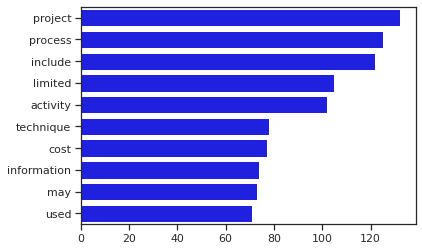

In [86]:
#Plot common words
#Obtain top 10 words
top_10 = fdist.most_common(10)
#Create pandas series to make plotting easier
fd = pd.Series(dict(top_10))
sns.set_theme(style="ticks")
sns.barplot(y=fd.index, x=fd.values, color='blue');

##<font color='Chocolate'> **12- Word Cloud** ☁️

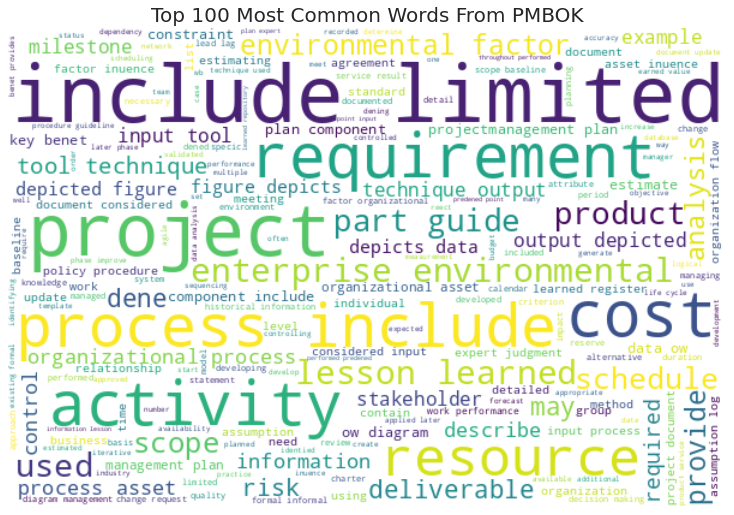

In [87]:
all_words = ' '.join([word for word in dfFinalee.Corpus_Lemma[:100]])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color='white').generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 100 Most Common Words From PMBOK",fontsize=20)
plt.tight_layout(pad=0)

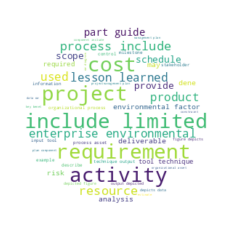

In [88]:
# Different style of word cloud to use
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

##<font color='Chocolate'> **Tests** 

In [94]:
# Matcher class object 
matcher = Matcher(nlp.vocab)

#define the pattern 
pattern = [{'POS':'NOUN'},
           {'LOWER': 'such'},
           {'LOWER': 'as'},
           {'POS': 'PROPN'}]
           
matcher.add("matching_1", [pattern]) 

for i in (dfFinalee['Corpus']):
  doc = nlp(i)
  matches = matcher(doc) 
  print(matches)
  #span = doc[matches[0][1]:matches[0][2]] 
  #print(span.text)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
